In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy.integrate import solve_ivp

In [2]:
global NumSpecies,mu,lambdaa,gamma,D,eta,kappa
mu0=0.5
NumSpecies=5
etas=np.arange(0,0.6,0.1)
repeat=500
gamma=0.9
kappa=0.005
D=0.2
thresh=0.01
timespan=np.arange(0,400,0.1)

In [3]:
def MultiSpecies(t,y):
    dydt=np.zeros(NumSpecies*(1+NumSpecies))
    for i in range(NumSpecies):
        ss=1
        sumy=0
        for j in range(NumSpecies):
            if i!=j:
                ss=ss*(1+lambdaa[j]*y[NumSpecies+i*NumSpecies+j]/y[i])
            sumy=sumy+y[j]
        dydt[i]=mu[i]*y[i]*ss*(1-(gamma*sumy-gamma*y[i]+y[i]))-D*y[i]
        for j in range(NumSpecies):
                if j==i:
                    dydt[NumSpecies+i*NumSpecies+j]=dydt[i]
                else:
                    ss=1
                    for k in range(NumSpecies):
                        if (k!=i)&(k!=j):
                            ss=ss*(1+lambdaa[k]*y[NumSpecies+i*NumSpecies+k]/y[i])
                    donor=0
                    for k in range(NumSpecies):
                        donor=donor+y[NumSpecies+k*NumSpecies+j]*eta[j,k,i]
                    dydt[NumSpecies+i*NumSpecies+j]=mu[i]*y[NumSpecies+i*NumSpecies+j]*ss*(1+lambdaa[j])*(1-(gamma*sumy-gamma*y[i]+y[i]))+(y[i]-y[NumSpecies+i*NumSpecies+j])*donor-(kappa+D)*y[NumSpecies+i*NumSpecies+j]
    return dydt

In [4]:
def GetPositive(input):
    temp=[]
    for i in input:
        if i>0:
            temp.append(i)
    return temp

In [5]:
initial=np.zeros(NumSpecies**2+NumSpecies)
for i in range(NumSpecies):
    initial[i]=1/NumSpecies
    initial[NumSpecies+i*NumSpecies+i]=initial[i]

diversity=np.zeros((3,len(etas),repeat))
richness=np.zeros((3,len(etas),repeat))
CoexistProb=np.zeros((3,len(etas)))
for jkl in range(3):
    for i in range(len(etas)):
        if jkl==0:
            eta=etas[i]*np.ones((NumSpecies,NumSpecies,NumSpecies))
        if jkl==1:
            eta=0*np.ones((NumSpecies,NumSpecies,NumSpecies))
            for ert in range(NumSpecies):
                for asd in range(NumSpecies):
                    for zxc in range(NumSpecies):
                        if zxc-asd==1 or (asd==NumSpecies-1 and zxc==0):
                            eta[ert,asd,zxc]=etas[i]
                            eta[ert,zxc,asd]=eta[ert,asd,zxc]
        if jkl==2:
            eta=etas[i]*2*np.random.rand(NumSpecies,NumSpecies,NumSpecies)
        print(i)
        for hjk in range(repeat):
            
            lambdaa=(-0.2+0.4*np.random.rand(NumSpecies))
            mu=mu0*(1+lambdaa)
            sol=solve_ivp(MultiSpecies,[0,max(timespan)],initial,method='RK45',t_eval=timespan)
            y=np.transpose(sol.y)
            temp=y[-1,range(NumSpecies)]
            temp=GetPositive(temp)
            temp=np.divide(temp,sum(temp))
            diversity[jkl,i,hjk]=np.exp(-sum(np.multiply(temp,np.log(temp))))
            richness[jkl,i,hjk]=sum(y[-1,range(NumSpecies)]>thresh)
        CoexistProb[jkl,i]=sum(richness[jkl,i,:]==NumSpecies)/repeat


0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5


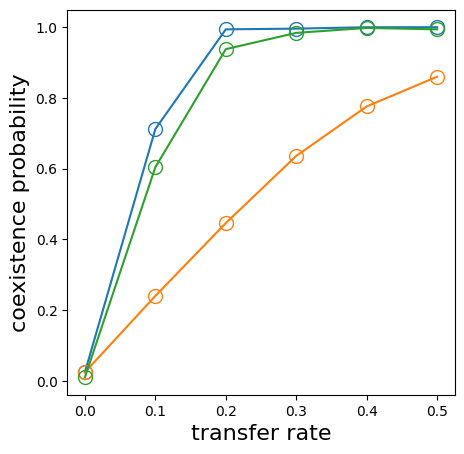

In [6]:
import seaborn as sns
CC=sns.color_palette('tab10')
plt.figure(figsize=(5,5))
for i in range(3):
    plt.plot(etas,CoexistProb[i,:],'o-',markersize=10,fillstyle='none',color=CC[i])
plt.xlabel('transfer rate',fontsize=16)
plt.ylabel('coexistence probability',fontsize=16)
#plt.xlim(0,0.2)
plt.savefig('MultiSpeciesPartialConnected.pdf')
plt.show()

In [8]:
import pandas as pd
df=pd.DataFrame(CoexistProb)
df.to_csv("MultiSpeciesPartialConnected.csv")